# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
#Прочитаем данные и запишем в переменную data_raw. 
#Отметим, что в качестве разделителя в файле данных используется табуляция.
data_raw = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем на экран общую информацию о таблице с данными.

In [2]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Просмотрим первые 10 строк таблицы.

In [3]:
#В нашем датасете 22 столбца, далее по ходу исследования мы добавим еще несколько. 
#По умолчанию Pandas выводит только 20 столбцов, поэтому изменим соответствующую опцию.
pd.set_option('display.max_columns', 30)
data_raw.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим гистограммы для числовых данных. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

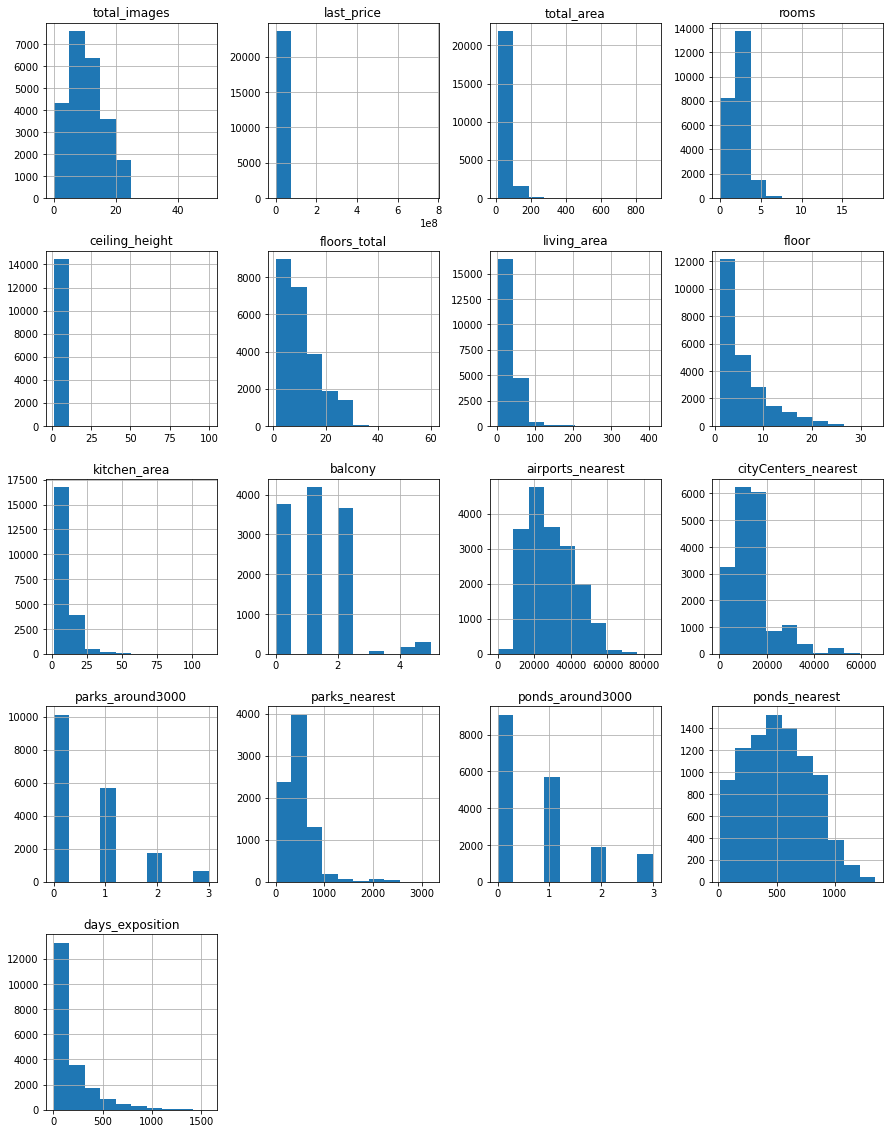

In [4]:
data_raw.hist(figsize=(15, 20))

Используя выкладки выше, мы можем оценить размерность таблицы, наименования и типы данных столбцов, наличие/отсутствие пропусков. Все это пригодится нам на этапе предобработки.

### Предобработка данных

#### Переименование столбцов
Приведем столбцы `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` к "змеиному" регистру. Столбцы `studio` и `open_plan` переименуем аналогично `is_apartment`, представив таким образом, мнемонически и единообразно заголовки булевых данных. 

In [5]:
data_nans_refined = data_raw.copy()
data_nans_refined = data_nans_refined.rename(
    columns={
        'cityCenters_nearest' : 'city_center_nearest', 
        'ponds_around3000' : 'ponds_around_3000',
        'parks_around3000' : 'parks_around_3000',
        'studio' : 'is_studio', 
        'open_plan' : 'is_open_plan'
    }
)

Убедимся, что переименование прошло успешно.

In [6]:
data_nans_refined.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Работа с дубликатами
Перед тем, как приступить к обработке пропусков, проверим, есть ли в нашей таблице повторяющиеся строки (явные дубликаты).

In [7]:
data_nans_refined.duplicated().sum()

0

Все строки уникальны. Поищем и, при необходимости, устраним неявные дубликаты в столбце `locality_name`, единственном с категориальными строковыми данными в нашем датасете. Взглянем на уникальные значения и оценим их количество:

In [8]:
#Для лучшего восприятия отсортируем данные 
unique_values = data_nans_refined['locality_name'].sort_values().unique()
print(
    'Количество уникальных значений:', len(unique_values),
    '\n\nСписок уникальных значений:', unique_values
)

Количество уникальных значений: 365 

Список уникальных значений: ['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Ага

Среди значений есть неявные дубликаты. Часть из них происходит из-за разночтений, типа посёлок/поселок. Другая связана с различными формулировками статуса поселения, например "городской поселок" и "поселок городского типа".  
Избавимся от неявных дубликатов, заменив все "ё" на "е" и унифицировав статусы поселений. Также используем общепринятые сокращения, чтобы облегчить восприятие данных. 

In [9]:
#Заменяем "ё" на "е"
data_nans_refined['locality_name'] = data_nans_refined['locality_name'].str.replace('ё', 'е')
#Для работы со статусами поселений используем словарь с регулярными выражениями, где  
# \\b - граница слова
# \\1 - подстрока слева от найденного
# \\2 - подстрока справа от найденного
replacements = {    
    '(\\b)городской поселок(\\b)' : '\\1гп.\\2',
    '(\\b)поселок городского типа(\\b)' : '\\1гп.\\2',
    '(\\b)коттеджный поселок(\\b)' : '\\1п.\\2',
    '(\\b)поселок при железнодорожной станции(\\b)' : '\\1п.ст.\\2',
    '(\\b)поселок станции(\\b)' : '\\1п.ст.\\2',
    '(\\b)поселок(\\b)' : '\\1п.\\2',            
    '(\\b)деревня(\\b)' : '\\1д.\\2',
    '(\\b)садоводческое некоммерческое товарищество(\\b)' : '\\1СНТ\\2',
    '(\\b)садовое товарищество(\\b)' : '\\1СНТ\\2',
    '(\\b)село(\\b)' : '\\1с.\\2'
}
data_nans_refined['locality_name'] = data_nans_refined['locality_name'].replace(replacements, regex=True)
#Проверим, что получилось
unique_values = data_nans_refined['locality_name'].sort_values().unique()
print(
    'Количество уникальных значений:', len(unique_values),
    '\n\nСписок уникальных значений:', unique_values
)

Количество уникальных значений: 321 

Список уникальных значений: ['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'СНТ Лесная Поляна' 'СНТ Новая Ропша'
 'СНТ Приладожский' 'СНТ Рахья' 'СНТ Садко' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'гп. Большая Ижора' 'гп. Будогощь' 'гп. Важины'
 'гп. Виллози' 'гп. Вознесенье' 'гп. Вырица' 'гп. Дружная Горка'
 'гп. Дубровка' 'гп. Ефимовский' 'гп. Кондратьево' 'гп. Красный Бор'
 'гп. Кузнечное' 'гп. Кузьмоловский' 'гп. Лебяжье' 'гп. Лесогорский'
 'гп. Мга' 'гп. Назия' 'гп. Никольский' 'гп. Новоселье' 'гп. Павлово'
 'гп. Приладожский' 'гп

Дубликаты удалены, а названия населенных пунктов с сокращениями гораздо удобнее воспринимать.

#### Работа с пропусками
Предыдущие этапы исследования выявили пропуски в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` и `days_exposition`. Для наглядности представим эти данные в форме таблицы.

In [10]:
data_nans_refined.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим каждый столбец и по возможности заполним пропуски.
##### Количество балконов и  является апартаментами
Для столбца `balcony` (количество балконов) предположим, что пропуски означают отсутствие балкона. Такие пропуски можно заполнить нулями.  
Пропуски в столбце `is_apartment` (апартаменты (булев тип)) могут обозначать, что квартира не является апартаментами. Такие пропуски заполним занчением `False`.

In [11]:
to_fill_with = {'balcony' : 0, 'is_apartment' : False}
data_nans_refined = data_nans_refined.fillna(to_fill_with)

##### Ближайшие парки, пруды, аэропорты и центр города
Столбцы `ponds_nearest` и `parks_nearest` - в первой тройке по количеству пропусков. Похоже, значительная их часть наблюдается в строках, где `ponds_around_3000` и `parks_around_3000` равны 0. Если предположить, что парки и пруды вне радиуса 3 км не интересны, то и пропуски выглядят обосновано. Посчитаем количество таких строк.

In [12]:
condition = '(ponds_nearest.isna() and parks_nearest.isna())\
         and (ponds_around_3000 == 0 and parks_around_3000 == 0)'
print(
    'Количество строк с пропусками, соответствующих условию:', 
    len(data_nans_refined.query(condition))
)

Количество строк с пропусками, соответствующих условию: 5816


При этом есть несколько строк, где расстрояние до ближайшего парка - больше 3 км при справедливом, нулевом значении `parks_around_3000`.

In [13]:
data_nans_refined.query('ponds_nearest > 3000 or parks_nearest > 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,False,False,False,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,False,False,False,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


Другая часть пропусков в `ponds_nearest` и `parks_nearest` наблюдается совместно с пропусками в `ponds_around_3000`, `parks_around_3000`, `airports_nearest` и `city_center_nearest` и покрывает практически все случаи пропусков в последних 4х упомянутых столбцах.

In [14]:
condition = 'ponds_nearest.isna() and parks_nearest.isna()\
 and ponds_around_3000.isna() and parks_around_3000.isna()\
 and airports_nearest.isna() and city_center_nearest.isna()'
print(
    'Количество строк с пропусками, соответствующих условию:', 
    len(data_nans_refined.query(condition))
)

Количество строк с пропусками, соответствующих условию: 5518


Более того, данная ситуация распространяется на целые населенные пункты.

In [15]:
#Количество объявлений по населенным пунктам
localities = data_nans_refined.pivot_table(index='locality_name', values='total_images', aggfunc='count')
#Количество объявлений по населенным пунктам с пропусками в ponds_nearest, parks_nearest, 
#ponds_around_3000, parks_around_3000, airports_nearest и city_center_nearest
localities_with_nans = data_nans_refined.query(condition)\
                                        .pivot_table(index='locality_name', values='total_images', aggfunc='count')
localities.join(localities_with_nans, rsuffix='_nans')

,total_images,total_images_nans
locality_name,,
Бокситогорск,16,16.0
Волосово,36,36.0
Волхов,111,111.0
Всеволожск,398,398.0
Выборг,237,237.0
...,...,...
с. Путилово,2,2.0
с. Рождествено,3,3.0
с. Русско-Высоцкое,9,9.0


Похоже, при добавлении картографических данных к пользовательским, что-то пошло не так. Изложенное выше является основанием для bug report'а.
##### Другие столбцы
Для столбцов `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `locality_name` и `days_exposition` не удалось выдвинуть правдоподобную гипотезу, позволяющую заполнить пропуски. Оставляем их, как есть.

#### Работа с типами данных

Посмотрим какие типы данных содержатся в нашей таблице.

In [16]:
data_types_refined = data_nans_refined.copy()
data_types_refined.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
is_studio                  bool
is_open_plan               bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_center_nearest     float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Данные некоторых столбцов необходимо привести к более подходящему типу: 
 - `first_day_exposition` (дата публикации) к типу datetime, чтобы в дальнейшем производить операции с датами;
 - `balcony` к типу integer т.к. данные этого столбца описываются целыми числами.
Данные в столбцах `floors_total`, `parks_around_3000`, `ponds_around_3000`, `days_exposition` так же относятся к целочисленному типу, но из-за обилия пропусков (NaN соответствует типу float) мы не можем произвести преобразование.

In [17]:
#Преобразуем тип данных в 'first_day_exposition'...
data_types_refined['first_day_exposition'] = pd.to_datetime(
    data_types_refined['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#... и других столбцах
data_types_refined = data_types_refined.astype({'balcony' : 'int64'})
#Проверим, как прошло преобразование
data_types_refined.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_center_nearest            float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Преобразование прошло корректно.

#### Работа с аномальными значениями
Рассмотрим общее числовое описание данных. 

In [18]:
data_stat_refined = data_types_refined.copy()
data_stat_refined.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Похоже, что в столбцах `total_area`, `rooms`, `ceiling_height`, `floors_total`, `living_area`, `kitchen_area` имеются аномальные занчения. Рассмотрим каждый случай отдельно.
##### Количество комнат
Обращают на себя внимание записи датасета с количеством комнат, равным 0. Выглядит странно. Посмотрим несоклько таких объявлений. 

In [19]:
data_stat_refined.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2,п. Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,True,NaN,0,д. Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,False,True,NaN,1,п. Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0,п. Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,True,False,NaN,0,д. Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,True,False,NaN,0,п. Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,False,False,True,NaN,1,п. Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,False,True,NaN,1,п. Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.00,7,False,False,True,NaN,2,п. Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


Похоже, такое количество комнат распространено в квартирах со свободной планировкой или студиях. Проверим, так ли это.

In [20]:
data_stat_refined.pivot_table(index='rooms', values=['is_studio', 'is_open_plan'], aggfunc='sum').head()

,is_open_plan,is_studio
rooms,,
0,59,138
1,3,11
2,1,0
3,2,0
4,1,0


Предположение подтвердилось. Одновременно мы видим противоречия в данных: свободная планировка подразумевает единое пространство, где перегородками отделен только санузел. То же можно сказать и про студию. Т.е. ни в квартире свободной планировки, ни в студии не может быть более одной комнаты. Квартиры с 0 комнат так же быть не может.  
Исправим это, установив для студий и квартир со свободной планировкой количество комнат равное 1.   

In [21]:
data_stat_refined.loc[(data_stat_refined['is_studio']) | (data_stat_refined['is_open_plan']), 'rooms'] = 1

Максимальное количество комнат установим в соответствии с максимумом диаграммы размаха (Q3 + 1.5IQR). Для нашего случая он равен 6. Теоретически можно представить квартиру и с 19 комнатами (наш максимум), однако такое количество явно походит на исключение. А для того, чтобы проследить надежные закономерности, нам нужны типичные случаи.  
Отсечем лишние значения.

In [22]:
data_stat_refined = data_stat_refined.query('1 <= rooms <= 6')
data_stat_refined['rooms'].describe()

count    23609.000000
mean         2.055741
std          0.993640
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Медианное и среднее значения практически сравнялись. Т.о., мы привели данные к виду более однородному и отвечающему типичной реальности.
##### Высота потолков

In [23]:
data_stat_refined['ceiling_height'].describe()

count    14439.000000
mean         2.768886
std          1.263030
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

При небольшом различии между средним и медианным значением, наблюдаем аномальные минимум и максимум.
Предположим, что подавляющее большинство квартир имет высоту потолка в интервале 2,4-4,2м. Минимум в данном случае  определен современными нормами строительства. Максимум же взят со ссылкой на социальный проект ["Квартирные трансформации"](https://spbspecials.rbc.ru/transformation), который описывает развитие жилого строительства в истории Санкт-Петербурга. Вот цитата оттуда: "С начала XX века появляются и особые дома с дешевыми квартирами для неимущих. Как пишет Екатерина Юхнева в книге «Петербургские доходные дома. Очерки из истории быта», высота потолков в таких квартирах снизилась почти в полтора раза (2,8 м против привычных 4,2 м)..."  
Дополнительно предположим, что в части объявлений допущена описка: вместо 3,5м указано 35м, вместо 2,4 - 24 и т.д.  
Исправим ошибки и отсечем лишние значения.

In [24]:
#Создадим функцию, исправляющую описки в высоте потолка
def refine_ceiling_height(height):
    if 24 <= height <= 42:
        return height/10
    else:
        return height
    
data_stat_refined['ceiling_height'] = data_stat_refined['ceiling_height'].apply(refine_ceiling_height)
data_stat_refined = data_stat_refined.query('2.4 <= ceiling_height <= 4.2')
data_stat_refined['ceiling_height'].describe()

count    14383.000000
mean         2.720896
std          0.258899
min          2.400000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.200000
Name: ceiling_height, dtype: float64

Отмечаем, что разница между средним и медианным значением уменьшилась, значительно снизилось стандартное отклонение. Т.о., данные стали более правдоподобными и однородными.

##### Жилая площадь

In [25]:
data_stat_refined['living_area'].describe()

count    13597.000000
mean        34.960662
std         20.020263
min          2.000000
25%         19.100000
50%         30.700000
75%         43.000000
max        300.000000
Name: living_area, dtype: float64

Как и в случае с высотами потолков, наблюдаем аномальные минимум и максимум. Заметна разница между средним и медианным значением, а также стандартное отклонение в 20 м2.  
Определим нижнюю границу площадью 9 м2 (минимальная норма для одноместного номера в общежитии гостиничного типа). Максимум диаграммы размаха (Q3 + 1.5IQR) для нашего случая равен 78,85 м2. Т.о., верхнюю границу определим равной 80 м2.  
Отсечем лишние значения.

In [26]:
data_stat_refined = data_stat_refined.query('9 <= living_area <= 80')
data_stat_refined['living_area'].describe()

count    13165.000000
mean        32.656675
std         14.434481
min          9.000000
25%         19.000000
50%         30.100000
75%         42.000000
max         80.000000
Name: living_area, dtype: float64

Отмечаем, что среднее и медианное значения сблизились, стандартное отклонение уменьшилось. Т.о., данные стали более правдоподобными и однородными.

##### Общая площадь

In [27]:
data_stat_refined['total_area'].describe()

count    13165.000000
mean        57.041562
std         22.662285
min         12.000000
25%         40.500000
50%         52.000000
75%         68.500000
max        260.000000
Name: total_area, dtype: float64

Аномальный максимум смещает среднее значение в верхнюю часть диапазона. В то же время минимальное значение выглядит правдоподобным.  
Как и в предыдущем случае, определим максимум диаграммы размаха (Q3 + 1.5IQR). В нашем случае он равен 110,5 м2. Т.о., верхнюю границу определим равной 111 м2.  
Отсечем лишние значения.

In [28]:
data_stat_refined = data_stat_refined.query('total_area <= 111')
data_stat_refined['total_area'].describe()

count    12798.000000
mean        54.983106
std         19.130383
min         12.000000
25%         40.000000
50%         51.000000
75%         66.900000
max        111.000000
Name: total_area, dtype: float64

Показатели немного улучшились. Данные стали более однородны.

##### Площадь кухни

In [29]:
data_stat_refined['kitchen_area'].describe()

count    12451.000000
mean         9.764209
std          4.329416
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         55.700000
Name: kitchen_area, dtype: float64

Как и в предыдщих случаях, отмечаем аномальные минимум и максимум.  
Минимальную полощадь ограничим 5 м2 в соответствии с текущими нормами, а максимальную подберем, исходя из максимума диаграммы размаха (Q3 + 1.5IQR). В нашем случае он равен 17 м2. Верхнюю границу определим равной 20 м2, исходя из предположения, что в больших квартирах под кухню-столовую отводят больше места.  
Отсечем лишние значения.

In [30]:
data_stat_refined = data_stat_refined.query('5 <= kitchen_area <= 20')
data_stat_refined['kitchen_area'].describe()

count    12063.000000
mean         9.318346
std          3.054509
min          5.000000
25%          7.000000
50%          8.800000
75%         11.000000
max         20.000000
Name: kitchen_area, dtype: float64

В части стандартного отклонения и разницы между средним и медианным значением показатели несколько улучшились.
##### Соотношение площадей
Проверим оставшиеся записи на соответствие условию: сумма жилой площади и площади кухни должна быть меньше общей площади. 

In [31]:
condition = 'living_area + kitchen_area >= total_area'
print('Количество строк, не соответствующих условию:', len(data_stat_refined.query(condition)))

Количество строк, не соответствующих условию: 66


Исключим такие строки.

In [32]:
data_stat_refined = data_stat_refined.query('not(' + condition + ')')

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена квадратного метра
Рассчитаем стоимость квадратного метра, как отношение цены квартиры к ее общей площади. Округлим значение до рубля и запишем его в столбец `price_for_m2`.

In [33]:
data_stat_refined['price_for_m2'] = (data_stat_refined['last_price'] / data_stat_refined['total_area']).round()

#### День, месяц и год публикации объявления
Рассчитаем день недели (где 0 - пн, 6 - вс), месяц и год публикации объявления. Данные запишем в столбцы `exp_day`, `exp_month`, `exp_year` соответственно.

In [34]:
data_stat_refined['exp_day'] = pd.DatetimeIndex(data_stat_refined['first_day_exposition']).dayofweek
data_stat_refined['exp_month'] = pd.DatetimeIndex(data_stat_refined['first_day_exposition']).month
data_stat_refined['exp_year'] = pd.DatetimeIndex(data_stat_refined['first_day_exposition']).year

#### Категоризация этажа
В столбец `floor_cat` запишем категории "первый", "последний" и "другой", соответствующие этажу, где расположена квартира.

In [35]:
#Опишем функцию, определяющую категорию этажа. 
#ПРИНИМАЕТ строку DataFrame
#ВОЗВРАЩАЕТ категорию этажа типа string или NaN, 
#если категорию невозможно определить из-за пропусков в данных
def get_floor_category(row):
    nan_value = np.nan
    floors_total = row['floors_total']
    floor = row['floor']
    if pd.isna(floor):
        return nan_value
    elif floor == 1:
        return 'первый'
    else:        
        if pd.isna(floors_total):
            return nan_value
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'

data_stat_refined['floor_cat'] = data_stat_refined.apply(get_floor_category, axis=1)

#### Расстояние до центра в км

В столбец `city_center_nearest_km` запишем расстояние в км, предварительно округлив его до целых значений.

In [36]:
data_stat_refined['city_center_nearest_km'] = (data_stat_refined['city_center_nearest'] / 1000).round()

#### Заключение
Посмотрим, что изменилось в датасете.

In [37]:
data_stat_refined.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,exp_day,exp_month,exp_year,floor_cat,city_center_nearest_km
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3,11,2017,другой,14.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82944.0,5,7,2017,последний,33.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.0,3,11,2017,первый,11.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104839.0,4,1,2017,другой,11.0


Как видно, новые столбцы на месте, а преобразования прошли верно.

### Проведите исследовательский анализ данных

#### Параметры объектов
С помощью гистограмм рассмотрим различные признаки.
##### Площадь: общая, жилая, кухни

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

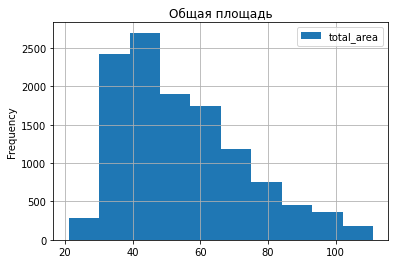

In [38]:
data_stat_refined.plot(kind='hist', y='total_area', grid=True, title='Общая площадь')

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

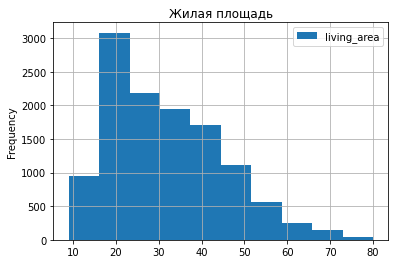

In [39]:
data_stat_refined.plot(kind='hist', y='living_area', grid=True, title='Жилая площадь')

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

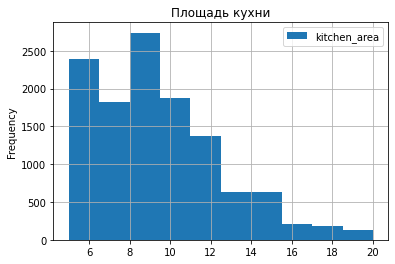

In [40]:
data_stat_refined.plot(kind='hist', y='kitchen_area', grid=True, title='Площадь кухни')

Основная масса жилого фонда имеет общую площадь в пределах от 30 до 75м2, жилую - от 16 до 50м2. Наиболее распространены квартиры с общей площадью от 30 до 50м2 и жилой площадью от 16 до 37м2. Типичная площадь кухни - 5-12м2.   
Гистограммы в правой части более пологи и походят на нормальное распределение, левая же часть - крутая и скачкообразная.  
Выраженные максимумы в левой части гистограмм могут свидетельствовать, что в жилом фонде преобладают квартиры с меньшей площадью, что объяснимо. Такие квартиры более ликвидны, это на руку застройщику, т.к. уменьшает время между сдачей дома и получением выручки. 
##### Цена объекта

<AxesSubplot:ylabel='Frequency'>

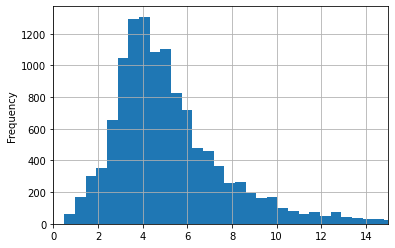

In [41]:
#Для удобства приведем цены к размерности млн.руб.
last_price_mil = data_stat_refined['last_price'] / 1000000
#Подберем параметр bins так, чтобы цена столбца приблизительно равнялась четверти миллиона
last_price_mil.plot(kind='hist', bins=110,  grid=True, xlim=(0, 15))

Видно, что цены на объекты недвижимости распределены практически нормально. Наиболее типичные значения находятся в пределах от 3 до 5 млн.руб 
##### Количество комнат   

<AxesSubplot:ylabel='Frequency'>

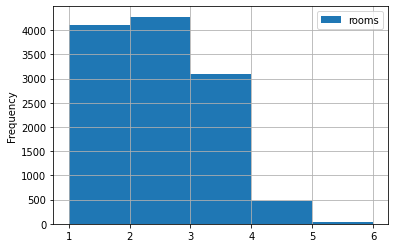

In [42]:
#Исключим из выборки квартиры с открытой планировкой, т.к. 
#количество комнат для них определится только на этапе возведения перегородок.
#А в нынешнем виде (с 1 комнатой) они могут исказить гистограмму.
rooms = data_stat_refined.query('not(is_open_plan)')
#Подберем параметр bins так, чтобы цена столбца равнялась 1
rooms.plot(kind='hist', y='rooms', bins=5, grid=True)

Подавляющее большинство (около 8500) квартир имеют одну или две комнаты. Трехкомнатные квартиры распространены, но заметно меньше (чуть более 3000). Четырех- и пятикомнатные квартиры составляют абсолютное меньшинство (менее 600 предложений).  
Данная гистограмма также подтверждает гипотезу, что малогабаритное жилье существенно преобладает над крупногабаритным.
##### Высота потолков

<AxesSubplot:ylabel='Frequency'>

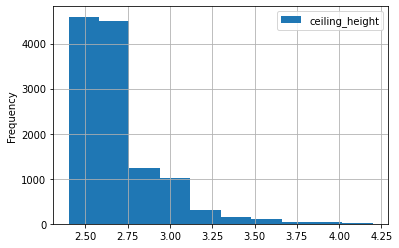

In [43]:
data_stat_refined.plot(kind='hist', y='ceiling_height', grid=True)

Наиболее типичная высота потолка находится в промежутке 2,4-2,75м. Меньшая, но все же заметная доля приходится на интервал 2,75-3,2м. Высоты за этими пределами являются редкостью. 
##### Этаж, тип этажа и общее количество этажей в доме    

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

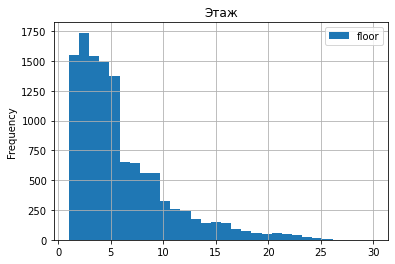

In [44]:
data_stat_refined.plot(kind='hist', y='floor', grid=True, bins=30, title='Этаж')

Абсолютное большинство собственников предпочитают селиться не выше 6 этажа. Обратим внимание на пик в районе 3го этажа, напоминающий нам о распространенном в быту мнении. 

<AxesSubplot:title={'center':'Всего этажей'}, ylabel='Frequency'>

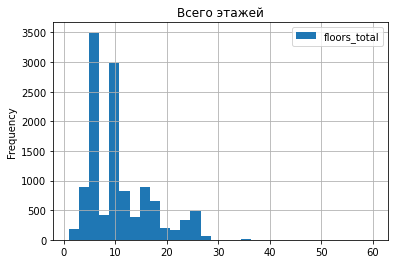

In [45]:
data_stat_refined.plot(kind='hist', y='floors_total', grid=True, bins=30, title='Всего этажей')

Диаграмма полностью подтвеждает, что в массовой застройке наиболее распространены 5 и 9-10 этажные дома. Малоэтажки и небоскребы встречаются сравнительно редко. 

<AxesSubplot:title={'center':'Категория этажа'}, ylabel='floor_cat'>

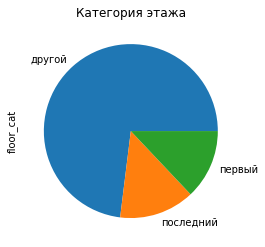

In [46]:
data_stat_refined['floor_cat'].value_counts().plot(kind='pie', title='Категория этажа')

Почти 75% собственников живут между первым и последним этажами. Доли живущих на первом или последнем этаже почти равны и составляют приблизительно 12-13%. 
##### Расстояние до центра, ближайшего аэропорта и парка    

<AxesSubplot:title={'center':'Расстояние до центра, км'}, ylabel='Frequency'>

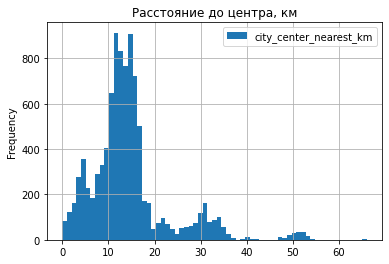

In [47]:
data_stat_refined.plot(kind='hist', y='city_center_nearest_km', grid=True, title='Расстояние до центра, км', bins=65)

Подавляющее большинство квартир находятся в радиусе 10-18км от центра. Заметно меньше заселен радиус меньше 10км. Можем предположить, что со временем город растет, а исторический центр становится все менее заселенным.  
Обратим внимание на максимумы за 20км зоной. Вероятно, это населенные пункты, окружающие областной центр.

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта, км'}, ylabel='Frequency'>

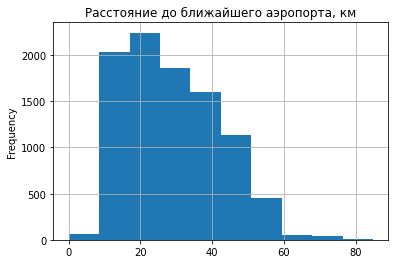

In [48]:
airports_nearest_km = data_stat_refined['airports_nearest'] / 1000
airports_nearest_km.plot(kind='hist', grid=True, title='Расстояние до ближайшего аэропорта, км')

Подавляющее большинство объектов недвижимости находятся в радиусе от 10 до 50км от аэропорта.

<AxesSubplot:title={'center':'Расстояние до парка, м'}, ylabel='Frequency'>

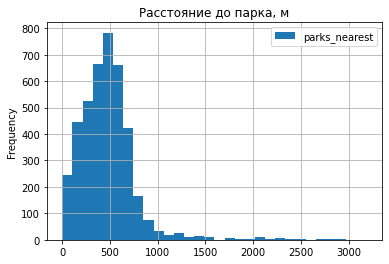

In [49]:
data_stat_refined.plot(kind='hist', y='parks_nearest', grid=True, title='Расстояние до парка, м', bins=30)

С т.з. урбанистики, парки и жилая застройка должны идти рука об руку. То же мы видим на гистограмме: абсолютное большинство объектов находятся в радиусе 100-750м от парка. 
##### День и месяц публикации объявления

<AxesSubplot:title={'center':'День публикации (0-пн...6-вс)'}, ylabel='Frequency'>

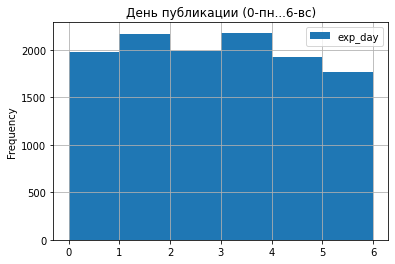

In [50]:
data_stat_refined.plot(kind='hist', y='exp_day', grid=True, title='День публикации (0-пн...6-вс)', bins=6)

Люди чаще публикуют объявления по вторникам и четвергам, немного реже - по понедельникам и средам. С пятницы наблюдаем спад активности, которая сходит на нет к воскресенью.

<AxesSubplot:title={'center':'Месяц публикации (1-янв...12-дек)'}, ylabel='Frequency'>

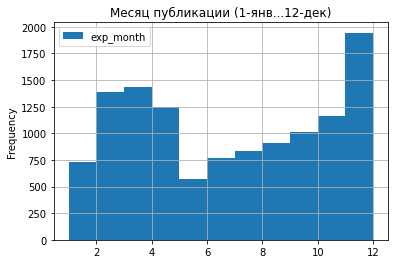

In [51]:
data_stat_refined.plot(kind='hist', y='exp_month', grid=True, title='Месяц публикации (1-янв...12-дек)', bins=11)

В декабре активность пользователей - около нуля. Вероятно, в преддверии нового года, люди не хотят заниматься операциями с недвижимостью. Активность возобновляется в январе, переходя в локальный максимум в феврале и марте. Несколько снижается в апреле, демонстрируя локальный минимум в мае (начало дачного сезона?). С июня равномерно растет до октября и показывает абсолютный максимум в ноябре. Интересно, что в сезон отпусков, с июля по сентябрь, спада активности не наблюдается.

#### Оценка длительности продаж
Посмотрим на гистограмму, а так же численное описание столбца `days_exposition`. Этот параметр показывает, сколько дней было размещено каждое объявление. 

count    10054.000000
mean       184.349015
std        220.779949
min          1.000000
25%         44.000000
50%        103.000000
75%        237.000000
max       1580.000000
Name: days_exposition, dtype: float64

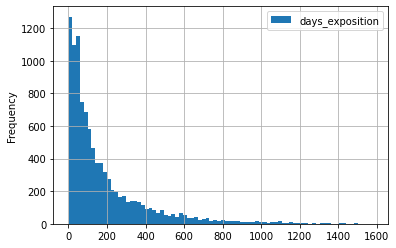

In [52]:
data_stat_refined.plot(kind='hist', y='days_exposition', grid=True, bins=80)
data_stat_refined['days_exposition'].describe()

Самое короткое размещение (min) составляет 1 день, самое длительное (max) 1580 дней. Среднее значение (mean = 184 дня) сильно выше медианного (median = 103 дня) из-за высоких значений самых долгих продаж.  
Видно, что большинство продаж совершаются в течение 200 дней со дня размещения объявления.  
Границы быстрых долгих продаж можно условно установить по первой (Q1 = 44 дня, быстрые продажи) и третьей (Q3 = 237, долгие продажи) квартилям. 
#### Влияние различных признаков на стоимость
##### Общая и жилая площадь, площадь кухни

<AxesSubplot:title={'center':'Влияние площади кухни на стоимость жилья'}, xlabel='kitchen_area', ylabel='last_price'>

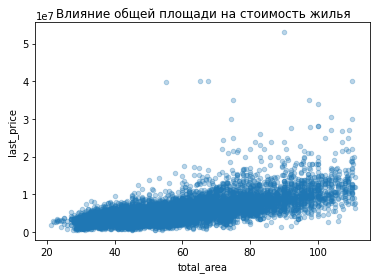

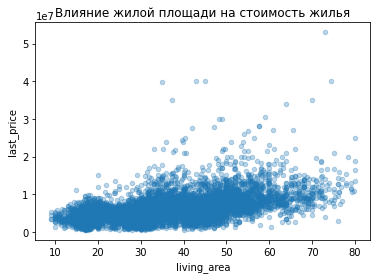

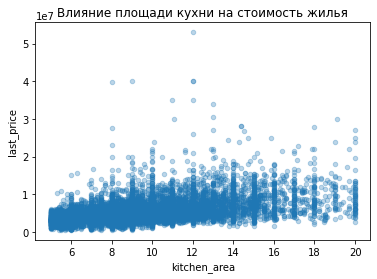

In [53]:
data_stat_refined.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3,
                       title='Влияние общей площади на стоимость жилья')
data_stat_refined.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, 
                       title='Влияние жилой площади на стоимость жилья')
data_stat_refined.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, 
                       title='Влияние площади кухни на стоимость жилья')

Во всех трех случая видна положительная корреляция. Цена медленно растет вслед за увеличением площади. Меньше всего это проявлено в случае с площадью кухни. Вид зависимости близок к линейной, попробуем применить коэффициент Пирсона для оценки силы корреляции.

In [54]:
print(
    'Коэффициент Пирсона: \n - цена/общая площадь', 
    data_stat_refined['last_price'].corr(data_stat_refined['total_area']).round(3),
    '\n - цена/жилая площадь',
    data_stat_refined['last_price'].corr(data_stat_refined['living_area']).round(3),
    '\n - цена/площадь кухни',
    data_stat_refined['last_price'].corr(data_stat_refined['kitchen_area']).round(3),
)      

Коэффициент Пирсона: 
 - цена/общая площадь 0.684 
 - цена/жилая площадь 0.573 
 - цена/площадь кухни 0.491


Цена показывает наиболее сильную связь с общей и жилой площадью, что логично. Площадь кухни оказывает менее заметное, косвенное влияние.
##### Количество комнат
Строим сводную таблицу с группировкой по количеству комнат и медианным значением цены. Выбираем медиану, чтобы снизить влияние максимумов и минимумов. Зависимость проследим на столбчатой диаграмме.

<AxesSubplot:xlabel='rooms'>

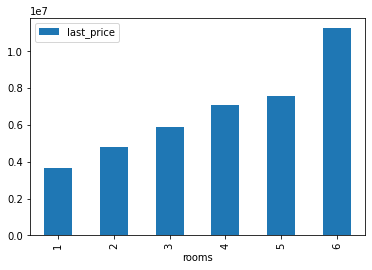

In [55]:
price_by_rooms = data_stat_refined.pivot_table(index='rooms', values='last_price', aggfunc='median') 
price_by_rooms.plot(kind='bar')

Наблюдаем практически линейный рост цены при увеличении количества комнат от 1 до 4. Между 4х и 5 комнатными квартирами  - небольшая разница стоимости в пользу последних. 6 комнатные квартиры показывают нелинейный рост в стоимости.  
Данные наблюдения лишний раз подтверждают положительную корреляцию между стоимостью и общей площадью квартиры.
#####  Категория этажа 
Строим сводную таблицу с группировкой по количеству комнат и медианным значением цены. Выбираем медиану, чтобы снизить влияние максимумов и минимумов. Зависимость проследим на столбчатой диаграмме.

<AxesSubplot:xlabel='floor_cat'>

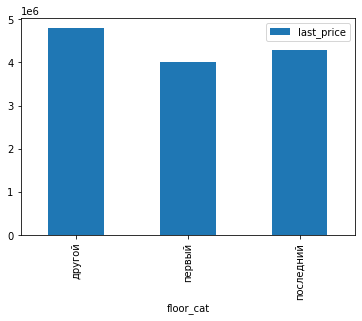

In [56]:
price_by_floor_cat = data_stat_refined.pivot_table(index='floor_cat', values='last_price', aggfunc='median')
price_by_floor_cat.plot(kind='bar')

Несмотря на небольшую разницу в медианных ценах, можно утверждать, что в общем случае квартиры на последнем этаже дороже, чем на первом. А квартиры на других этажах дороже, чем на последнем.
##### Дата размещения (день недели, месяц, год)
Строим сводную таблицу с группировкой дню недели, месяцу или году и медианным значением цены. Выбираем медиану, чтобы снизить влияние максимумов и минимумов. Зависимость проследим на столбчатой диаграмме.

<AxesSubplot:title={'center':'Влияние года размещения на стоимость жилья'}, xlabel='exp_year'>

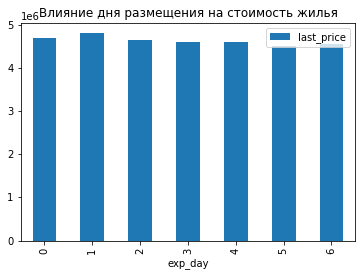

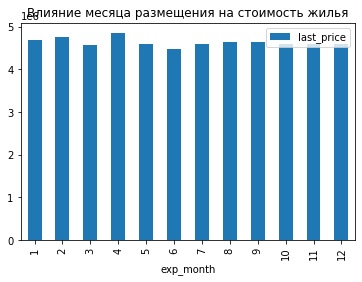

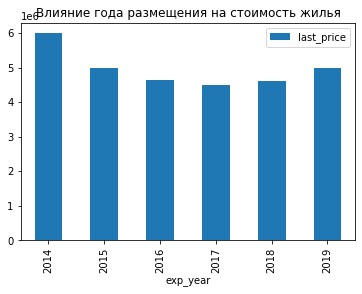

In [57]:
price_by_exp_day = data_stat_refined.pivot_table(index='exp_day', values='last_price', aggfunc='median')
price_by_exp_month = data_stat_refined.pivot_table(index='exp_month', values='last_price', aggfunc='median')
price_by_exp_year = data_stat_refined.pivot_table(index='exp_year', values='last_price', aggfunc='median')
price_by_exp_day.plot(kind='bar', title='Влияние дня размещения на стоимость жилья')
price_by_exp_month.plot(kind='bar', title='Влияние месяца размещения на стоимость жилья')
price_by_exp_year.plot(kind='bar', title='Влияние года размещения на стоимость жилья')

День и месяц размещения почти не влияют на стоимость объекта, чего нельзя сказать о годе. Здесь диаграмма показывает квадратичную зависимость с минимумом в 2017 году. Т.е. с 2014 по 2017 стоимость квартир падала, а с 2017 по 2019 росла практически симметрично. 
#### Средняя цена квадратного метра
##### Максимальная и минимальная
Опередлим населённые пункты с самой высокой и низкой средней стоимостью квадратного метра.

In [58]:
#Строим сводную таблицу с группировкой по населенным пунктам, 
#в качестве значений берем количество объявлений и среднюю цену м2
price_for_m2_mean = data_stat_refined.pivot_table(index='locality_name', values='price_for_m2', aggfunc=['count', 'mean'])
#Даем столбцам более понятные назвения и округляем цены до целых
price_for_m2_mean.columns = ['ads_count', 'price_for_m2_mean']
price_for_m2_mean['price_for_m2_mean'] = price_for_m2_mean['price_for_m2_mean'].round()
#Выводим населённые пункты с самой высокой и низкой стоимостью квадратного метра
condition = 'price_for_m2_mean in [price_for_m2_mean.max(), price_for_m2_mean.min()]'
price_for_m2_mean.query(condition).sort_values('price_for_m2_mean')

,ads_count,price_for_m2_mean
locality_name,,
п. Совхозный,1,12556.0
Санкт-Петербург,8193,109293.0


Максимальная средняя стоимость наблюдается в Санкт-Петербурге (109293.0 руб/м2), она почти в 9 раз выше минимальной, наблюдаемой в п. Совхозный (12556.0 руб/м2).
##### В наиболее активных населенных пунктах
Рассчитаем среднюю цену одного квадратного метра для 10 населённых пунктов с наибольшим числом объявлений.

,ads_count,price_for_m2_mean
locality_name,,
Санкт-Петербург,8193,109293.0
Всеволожск,237,67339.0
п. Шушары,197,79485.0
Пушкин,193,101127.0
Колпино,187,75836.0
п. Мурино,182,86385.0
Петергоф,132,83824.0
п. Парголово,130,91177.0
Гатчина,128,69655.0


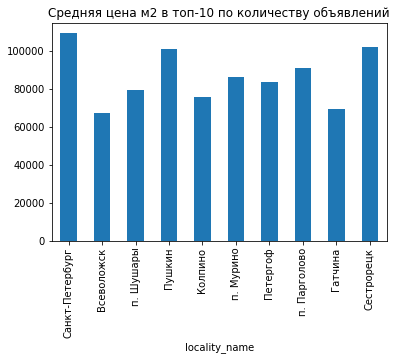

In [59]:
#Выделяем таблицу из 10 лидеров по количеству объявлений,
#выводим ее на экран вместе со столбчатой диаграммой
top_10_by_ads = price_for_m2_mean.sort_values('ads_count', ascending=False)[:10]
top_10_by_ads['price_for_m2_mean'].plot(kind='bar', title='Средняя цена м2 в топ-10 по количеству объявлений')
top_10_by_ads

По средней стоимости квадратного метра среди 10 неиболее активных населенных пунктов лидирует Санкт-Петербург, второе место делят Пушкин и Сестрорецк. На третьем - п. Парголово.
##### В СПб  в зависимости от расстояния до центра
Выделим объявления в Санкт-Петербурге и рассчитаем среднюю цену квадратного метра для каждого километра удаления от центра города. Зависимость покажем на диаграмме рассеяния.

<AxesSubplot:xlabel='distance_to_center_km', ylabel='price_for_m2_mean'>

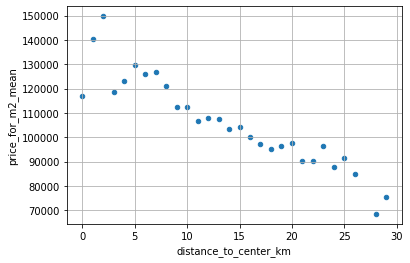

In [60]:
spb_price_by_center_km = data_stat_refined.query('locality_name == "Санкт-Петербург"').groupby('city_center_nearest_km')
distance = []
price = []
for name, data in spb_price_by_center_km:
    distance.append(name)
    price.append(data['price_for_m2'].mean().round())    
spb_price_by_center_km = pd.DataFrame({'distance_to_center_km' : distance, 'price_for_m2_mean' : price})
spb_price_by_center_km.plot(kind='scatter', x='distance_to_center_km', y='price_for_m2_mean', grid=True)

Видим отрицательную линейную корреляцию с заметным разбросом значений в диапазонах 0-5км и 25-30км. Такая картина подтверждает гипотезу: чем дальше от центра, тем ниже стоимость квадратного метра. Вероятно, разброс объясняется малым количеством объявлений для данного километра и/или наличием экстремально низких или высоких значений цены в этих объявлениях.  
Рассчитаем коэффициент Пирсона. 

In [61]:
print(
    'Коэффициент Пирсона равен',
    spb_price_by_center_km['price_for_m2_mean'].corr(spb_price_by_center_km['distance_to_center_km']).round(3))

Коэффициент Пирсона равен -0.932


Значение коэффициента говорит о сильной отрицательной зависимости.

### Общий вывод
В ходе предобработки данных были: 
 - переименованы столбцы (см. [2.1](#%D0%9F%D0%B5%D1%80%D0%B5%D0%B8%D0%BC%D0%B5%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D1%81%D1%82%D0%BE%D0%BB%D0%B1%D1%86%D0%BE%D0%B2))
 - устранены неявные дубликаты (см. [2.2](#%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0-%D1%81-%D0%B4%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%82%D0%B0%D0%BC%D0%B8)),
 - частично заполнены пропуски (см. [2.3](#%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0-%D1%81-%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%BC%D0%B8)),
 - скорректированы типы данных (см. [2.4](#%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0-%D1%81-%D1%82%D0%B8%D0%BF%D0%B0%D0%BC%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)),
 - обработаны аномальные значения (см. [2.5](#%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0-%D1%81-%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC%D0%B8-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%D0%BC%D0%B8)).
 
В исходных данных обнаружено множество пропусков, которые невозможно заполнить. Это касается как пользовательской, так и картографической части. Кроме того, характер пропусков в картографических данных, говорит об алгоритмической ошибке при объединении и является поводом для bug report'a (см. [2.3.2](#%D0%91%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D0%B5-%D0%BF%D0%B0%D1%80%D0%BA%D0%B8,-%D0%BF%D1%80%D1%83%D0%B4%D1%8B,-%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D1%8B-%D0%B8-%D1%86%D0%B5%D0%BD%D1%82%D1%80-%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%B0)).  
Так же обнаружено множество аномальных значений, которые как правило, можно объяснить ошибками пользователей.


Для проведения исследований были добавлены новые признаки:
- цена квадратного метра (см. [3.1](#%D0%A6%D0%B5%D0%BD%D0%B0-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BC%D0%B5%D1%82%D1%80%D0%B0)),
- день недели, месяц и год публикации объявления (см. [3.2](#%D0%94%D0%B5%D0%BD%D1%8C,-%D0%BC%D0%B5%D1%81%D1%8F%D1%86-%D0%B8-%D0%B3%D0%BE%D0%B4-%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8-%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)),
- категория этажа (см. [3.3](#%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-%D1%8D%D1%82%D0%B0%D0%B6%D0%B0)),
- дистанция до центра в км (см. [3.4](#%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5-%D0%B4%D0%BE-%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0-%D0%B2-%D0%BA%D0%BC)).


В ходе исследований было показано следующее:
- основная масса жилья имеет общую площадь в пределах от 30 до 75м2, жилую - от 16 до 50м2, площадь кухни - 5-12м2 (см. [4.1.1](#%D0%9F%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C:-%D0%BE%D0%B1%D1%89%D0%B0%D1%8F,-%D0%B6%D0%B8%D0%BB%D0%B0%D1%8F,-%D0%BA%D1%83%D1%85%D0%BD%D0%B8));
- большинство квартир имеют цену от 3 до 5 млн.руб (см. [4.1.2](#%D0%A6%D0%B5%D0%BD%D0%B0-%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B0)); 
- подавляющее большинство квартир - 1 и 2 комнатные, заметно меньше 3 комнатных. 4 и 5 комнатные квартиры составляют абсолютное меньшинство (см. [4.1.3](#%D0%9A%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE-%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82));
- типичная высота потолка находится в промежутке 2,4-2,75м, меньшая, но все же заметная, доля приходится на интервал 2,75-3,2м (см. [4.1.4](#%D0%92%D1%8B%D1%81%D0%BE%D1%82%D0%B0-%D0%BF%D0%BE%D1%82%D0%BE%D0%BB%D0%BA%D0%BE%D0%B2));
- абсолютное большинство собственников предпочитают селиться не выше 6 этажа. Наиболее распространены 5 и 9-10 этажные дома. Почти 75% собственников живут между первым и последним этажами (см. [4.1.5](#%D0%AD%D1%82%D0%B0%D0%B6,-%D1%82%D0%B8%D0%BF-%D1%8D%D1%82%D0%B0%D0%B6%D0%B0-%D0%B8-%D0%BE%D0%B1%D1%89%D0%B5%D0%B5-%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE-%D1%8D%D1%82%D0%B0%D0%B6%D0%B5%D0%B9-%D0%B2-%D0%B4%D0%BE%D0%BC%D0%B5));
- подавляющее большинство квартир находятся в радиусе 10-18км от центра, 10-50км от аэропорта и 100-750м от парка (см. [4.1.6](#%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5-%D0%B4%D0%BE-%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0,-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B5%D0%B3%D0%BE-%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%B0-%D0%B8-%D0%BF%D0%B0%D1%80%D0%BA%D0%B0));
- в основном объявления публикуют с понедельника по четверг. С пятницы наблюдаеется спад активности, которая сходит на нет к воскресенью (см. [4.1.7](#%D0%94%D0%B5%D0%BD%D1%8C-%D0%B8-%D0%BC%D0%B5%D1%81%D1%8F%D1%86-%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8-%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F));
- в декабре активность пользователей - около нуля, абсолютный максимум - в ноябре. Лоакльный максимум в феврале и марте, локальный минимум - в мае (см. [4.1.7](#%D0%94%D0%B5%D0%BD%D1%8C-%D0%B8-%D0%BC%D0%B5%D1%81%D1%8F%D1%86-%D0%BF%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8-%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F));
- большинство продаж совершаются в течение 200 дней со дня размещения объявления (см. [4.2](#%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0-%D0%B4%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6));
- цена квартиры растет с увеличением общей площади (см. [4.3.1](#%D0%9E%D0%B1%D1%89%D0%B0%D1%8F-%D0%B8-%D0%B6%D0%B8%D0%BB%D0%B0%D1%8F-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C,-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BA%D1%83%D1%85%D0%BD%D0%B8)), что подтверждается похожим ростом стоимости с увеличением количества комнат (см. [4.3.2](#%D0%9A%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE-%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82));
- квартиры на "последних" этажах несколько дороже, чем на "первых". А квартиры на "других" немного дороже, чем на "последних" (см. [4.3.3](#%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F-%D1%8D%D1%82%D0%B0%D0%B6%D0%B0));
- день и месяц объявления почти не влияют на стоимость квартиры. В разрезе по годам заметен волнообразный тренд (см. [4.3.4](#%D0%94%D0%B0%D1%82%D0%B0-%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F-(%D0%B4%D0%B5%D0%BD%D1%8C-%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8,-%D0%BC%D0%B5%D1%81%D1%8F%D1%86,-%D0%B3%D0%BE%D0%B4)));
- максимальная средняя цена м2 - в Санкт-Петербурге (109293.0 руб/м2), минимальная - в п. Совхозный (12556.0 руб/м2) (см. [4.4.1](#%D0%9C%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D0%B8-%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F));
- топ-3 по средней стоимости м2 среди 10 населенных пунктов с наибольшим количеством объявлений: Санкт-Петербург, Пушкин и Сестрорецк, п. Парголово (см. [4.4.2](#%D0%92-%D0%BD%D0%B0%D0%B8%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5-%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D1%85-%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D1%85-%D0%BF%D1%83%D0%BD%D0%BA%D1%82%D0%B0%D1%85));
- на примере Санкт-Петербурга подтверждена гипотеза: чем дальше от центра, тем ниже средняя стоимость квадратного метра (см [4.4.3](#%D0%92-%D0%A1%D0%9F%D0%B1--%D0%B2-%D0%B7%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8-%D0%BE%D1%82-%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F-%D0%B4%D0%BE-%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0))

Обобщающие заключения:
- среди рассмотренных признаков общая площадь и удаленность жилья от центра оказывают самое сильное влияние на цену квадратного метра;
- как правило, в городах стоимость квадратного метра выше, чем в поселках;
- в ходе предобработки мы сделали множество допущений из-за пропусков и различных ошибок в исходных данных. На этапе построения модели, это может отрицательно сказаться на ее предсказательной способности. Т.о., для реализации модели, необходимо использовать более точные данные.